### 1. Define the function and its gradient (vectorized)

We treat x as a vector, which is how ML libraries actually work.

In [3]:
import numpy as np
def f(x):
    return x**2
def grad_f(x):
    return 2*x
# Test it
x = np.array([1.0,2.0,3.0])

print("f(x):",f(x))
print("Gradient:",grad_f(x))

f(x): [1. 4. 9.]
Gradient: [2. 4. 6.]


#### Interpretation
* Each component is independent
* Gradient points away from zero
* Zero is the minimum

### 2. Gradient descent on a vector

Now let the vector learn to move toward the minimum.

In [4]:
x = np.array([3.0,-2.0,1.5])
lr = 0.1
history = []
for step in range(20):
    grad = grad_f(x)
    x = x-lr*grad
    history.append(x.copy())
    print(f"Step {step:2d}| x ={x}")

Step  0| x =[ 2.4 -1.6  1.2]
Step  1| x =[ 1.92 -1.28  0.96]
Step  2| x =[ 1.536 -1.024  0.768]
Step  3| x =[ 1.2288 -0.8192  0.6144]
Step  4| x =[ 0.98304 -0.65536  0.49152]
Step  5| x =[ 0.786432 -0.524288  0.393216]
Step  6| x =[ 0.6291456 -0.4194304  0.3145728]
Step  7| x =[ 0.50331648 -0.33554432  0.25165824]
Step  8| x =[ 0.40265318 -0.26843546  0.20132659]
Step  9| x =[ 0.32212255 -0.21474836  0.16106127]
Step 10| x =[ 0.25769804 -0.17179869  0.12884902]
Step 11| x =[ 0.20615843 -0.13743895  0.10307922]
Step 12| x =[ 0.16492674 -0.10995116  0.08246337]
Step 13| x =[ 0.1319414  -0.08796093  0.0659707 ]
Step 14| x =[ 0.10555312 -0.07036874  0.05277656]
Step 15| x =[ 0.08444249 -0.056295    0.04222125]
Step 16| x =[ 0.06755399 -0.045036    0.033777  ]
Step 17| x =[ 0.0540432 -0.0360288  0.0270216]
Step 18| x =[ 0.04323456 -0.02882304  0.02161728]
Step 19| x =[ 0.03458765 -0.02305843  0.01729382]


#### What’s happening
* Each coordinate moves independently toward zero
* Larger values move faster
* This is gradient descent in parameter space

### 3. Visualizing 1D gradient descent
This helps connect slope and motion.

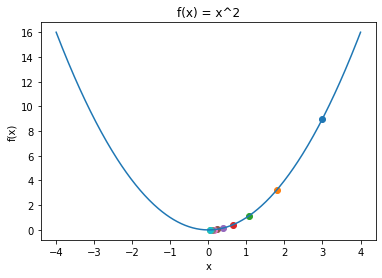

In [7]:
import matplotlib.pyplot as plt
x_vals = np.linspace(-4,4,400)
y_vals = f(x_vals)

plt.plot(x_vals,y_vals)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("f(x) = x^2")

# gradient descent path
x_point = 3.0
for _ in range(10):
    plt.scatter(x_point,f(x_point))
    x_point = x_point - 0.2*(2*x_point)
    
plt.show()


#### Observe
* Points move downhill
* Steps get smaller near minimum
* Gradient magnitude controls speed

### 4. 2D visualization (this feels like real ML)

Now treat x = [x₁, x₂].

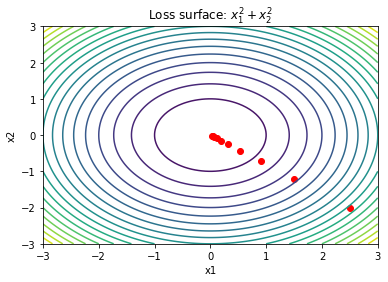

In [14]:
def f2(x,y):
    return x**2+y**2

x_vals = np.linspace(-3,3,100)
y_vals = np.linspace(-3,3,100)
X,Y = np.meshgrid(x_vals,y_vals)
Z = f2(X,Y)

plt.contour(X,Y,Z,levels = 20)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title(r"Loss surface: $x^{2}_{1}+x^{2}_{2}$")
# Gradient descent path:

x = np.array([2.5,-2.0])
lr = 0.2

for _ in range(10):
    plt.scatter(x[0],x[1],color = "red")
    x = x - lr*2*x
    
plt.show()

#### Key insight
* Gradient points directly away from the center
* Descent moves straight toward minimum
* In real ML, surfaces are not this smooth

### 5. Numerical gradient check (advanced intuition)
This confirms gradients without formulas.

In [16]:
def numerical_grad(x,eps=1e-6):
    grad = np.zeros_like(x)
    for i in range(len(x)):
        x1 = x.copy()
        x2 = x.copy()
        x1[i] += eps
        x2[i]-=eps
        grad[i]=(f(x1)[i]-f(x2)[i])/(2*eps)
    return grad

x = np.array([1.0,2.0,3.0])

print("Analytical gradient:",grad_f(x))
print("Numerical gradient:",numerical_grad(x))

# They match.
# This is how ML libraries test gradient correctness.

Analytical gradient: [2. 4. 6.]
Numerical gradient: [2. 4. 6.]


### 6. ML takeaway
* Gradients point in steepest ascent
* Gradient descent moves opposite
* Vectorization lets every parameter update at once

This scales directly to millions of parameters

#### Practice extensions
* Change function to x⁴
* Use different learning rates per coordinate
* Add noise and observe convergence
* Replace squared loss with absolute value and compare behavior